In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import plotly.express as px
import seaborn as sns

In [2]:
data = pd.read_csv('email.csv',sep=';')

In [3]:
data.head()

,emails
0,a_vanessinha_1990@hotmail.com
1,a3sign@pandora.be
2,aaanika2@hotmail.com
3,aaron2003s@bol.com.br
4,aaron--21@hotmail.com


# SEPARANDO NOME DO DOMíNIO
 a função recebe como parâmetro a lista de e-mails, quebra a string e coleta somente o domínio

In [4]:
def domain(domain):
    lista=[]
    domns=[]
    for dominio in domain:
        lista.append(dominio)
    for dominio in lista:
        domns.append(dominio.split('@')[-1])
    return domns
domain=domain(data['emails'])

In [5]:
data['Dominios'] = domain
data.head()

,emails,Dominios
0,a_vanessinha_1990@hotmail.com,hotmail.com
1,a3sign@pandora.be,pandora.be
2,aaanika2@hotmail.com,hotmail.com
3,aaron2003s@bol.com.br,bol.com.br
4,aaron--21@hotmail.com,hotmail.com


In [6]:
data['Dominios'].value_counts()

hotmail.com     3153
yahoo.com.br    1846
gmail.com        879
bol.com.br       404
ig.com.br         58
                ... 
codex.com          1
amigo.com.br       1
buecker.com        1
hotimail.com       1
hotmail.coml       1
Name: Dominios, Length: 152, dtype: int64

# VALIDANDO OS EMAILS ESCRITOS INCORRETAMENTE
separando emaisl pouco usuais e escritos incorretamente dos emails validos

In [7]:
validos = []
invalidos=[]
for dominio in domain:
    if domain.count(dominio) <= 100:
        invalidos.append(dominio)
    else:
        validos.append(dominio)

In [8]:
len(validos)

6282

In [9]:
len(invalidos)

575

In [10]:
index=np.arange(0,6282)

In [11]:
valids = pd.Series(validos, index)

In [12]:
valids.value_counts().sort_values(ascending=False)

hotmail.com     3153
yahoo.com.br    1846
gmail.com        879
bol.com.br       404
dtype: int64

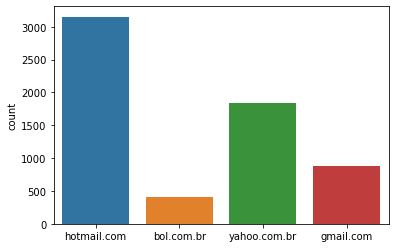

In [13]:
sns.countplot(x=valids);